# Homework3 
#### In this assignment, you will design, implement, and evaluate the appropriate models for given data.
### Goal of this assignment is to help you to solve HW4. (which  takes high  proportion of grading)<br><br><i>Do your best to solve the problems below, but don't be too intence on HW3 in order not to be exhausted.</i>
<br>
Version 1 (2017-04-07 pm 03:00) 

* Datasets which included in Scikit-learn will be used.
* Perform the steps described below selectively(i.e. on your choice) for each dataset.
>0. Preprocess; normalization, feature selection, etc.
>1. Model selection; characteristics of datasets need to be comprehended.
>2. Evaluation; This step should be done properly to prevent overfitting problem.
>3. Enhancement; parameter tuning and feature selection, etc.

In [1]:
import sklearn
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
from sklearn.metrics import mean_squared_error

## Dataset 1: Boston house-prices dataset

* <h3>GOAL<br>: Predict <b>house price</b> using given features.</h3>
* First, you need to check <b>shape of dataset</b>; # of samples, # of features

In [2]:
boston = datasets.load_boston()
#Let's check shape of dataset. How many samples and features do you received?
n_samples = boston.data.shape[0]
n_features = boston.data.shape[1]

print "Total samples available:", n_samples
print "Total features available:", n_features

Total samples available: 506
Total features available: 13


* You can check information of each featurea from below table.

| Feature | Description |
|-----------------|-------------------------|
|CRIM|     per capita crime rate by town|
|ZN       |proportion of residential land zoned for lots over 25,000 sq.ft.|
|INDUS|    proportion of non-retail business acres per town|
|CHAS  |   Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)|
|NOX    |  nitric oxides concentration (parts per 10 million)|
|RM    |   average number of rooms per dwelling|
|AGE   |   proportion of owner-occupied units built prior to 1940|
|DIS    |  weighted distances to five Boston employment centres|
|RAD   |   index of accessibility to radial highways|
|TAX   |   full-value property-tax rate per one thousand dollor |
|PTRATIO|  pupil-teacher ratio by town |
|B      |  1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town|
|LSTAT  |  % lower status of the population|
##### <center>Table: Feature information of Boston house-price data set</center>


###  Analyze and evaluate given data.

> *There are no guidelines or strict answers for this assignment.<br/>
> <b>Try various methods to improve model performance</b>, but the reason for your choice should be attached in this report.*

> \* Be careful not to make errors such as overfitting problem.<br/>

> *(As an example of "various methods", some irrelevant/less relevant features can be removed. It can be done by human intuition, as well as through machine learning models. a.k.a. feature selection (Step 4))*

## Step 1: Preprocess
- Let's apply various preprocessing operations which we learned in lecture / assignments.
- Try best to choose correct preprocessing method for each feature types.<br/>
\* *hint: First, you need to know how values of each features look like.*

In [3]:
tsv = pd.DataFrame(boston.data)

In [4]:
tsv.columns = boston.feature_names
tsv.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [5]:
tsv['PRICE'] = boston.target
#print tsv['PRICE']

## Step 2: Select appropriate model
- Is it a <b>regression problem</b>? or a <b>classification problem</b>?
- There are various models, most of them are *avilable as API*. (we recommend you to browse them in scikit-learn)
- We can not decide which model will have better performance.<br/>(Although the model is limited by the size of the data and the number of samples)
- So, list models which, you think, will perform good. (import them)

In [6]:
#TODO: Import APIs which you want to use
from sklearn.linear_model import LinearRegression

In [7]:
X = tsv.drop('PRICE', axis = 1)

lr = LinearRegression()

In [8]:
lr.fit(X, tsv.PRICE)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [9]:
pd.DataFrame(zip(X.columns, lr.coef_), columns = ['features', 'estimatedCoefficients'])

,features,estimatedCoefficients
0,CRIM,-0.107171
1,ZN,0.046395
2,INDUS,0.020860
3,CHAS,2.688561
4,NOX,-17.795759
5,RM,3.804752
6,AGE,0.000751
7,DIS,-1.475759
8,RAD,0.305655
9,TAX,-0.012329


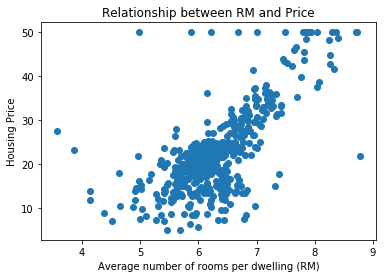

In [10]:
plt.scatter(tsv.RM, tsv.PRICE)
plt.xlabel("Average number of rooms per dwelling (RM)")
plt.ylabel("Housing Price")
plt.title("Relationship between RM and Price")
plt.show()

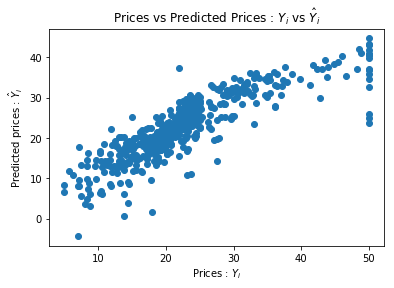

In [11]:
plt.scatter(tsv.PRICE, lr.predict(X))
plt.xlabel("Prices : $Y_i$")
plt.ylabel("Predicted prices : $\hat{Y}_i$")
plt.title("Prices vs Predicted Prices : $Y_i$ vs $\hat{Y}_i$")
plt.show()

In [12]:
new=pd.DataFrame(boston.data)
new.columns = boston.feature_names
#new = new.drop('CRIM',axis=1)
#new = new.drop('ZN',axis=1)
#new = new.drop('INDUS',axis=1)
#new = new.drop('CHAS',axis=1)
#new = new.drop('NOX',axis=1)
new = new.drop('AGE',axis=1)
#new = new.drop('DIS',axis=1)
new = new.drop('RAD',axis=1)
#new = new.drop('TAX',axis=1)
#new = new.drop('PTRATIO',axis=1)
#new = new.drop('B',axis=1)
#new = new.drop('LSTAT',axis=1)
#print new.head()


lr2 = LinearRegression()
lr2.fit(new,tsv.PRICE)
print mean_squared_error(lr2.predict(new),tsv.PRICE)

22.8466584382


In [13]:
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import *
from sklearn import ensemble

X_train1, X_test1, y_train1, y_test1 = train_test_split(boston.data, boston.target, test_size=0.3)
clf_et=ensemble.ExtraTreesRegressor(n_estimators=10)
#train_and_evaluate(clf_et,X_train1,y_train1)
clf_et.fit(X_train1,y_train1)
cv = KFold(X_train1.shape[0], 5, shuffle=True)

C:\Users\lgpc\Anaconda\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [14]:
importances = clf_et.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf_et.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
sf = ['CRIM','ZN','INDUS','CHAS,NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','PRICE']
# Print the feature ranking
print("Feature ranking:")


for f in range(X_train1.shape[1]):
    print("%d. %s (%f)" % (f + 1, sf[f], importances[indices[f]]))



Feature ranking:
1. CRIM (0.400815)
2. ZN (0.305428)
3. INDUS (0.058650)
4. CHAS,NOX (0.050391)
5. RM (0.043226)
6. AGE (0.034116)
7. DIS (0.024940)
8. RAD (0.019990)
9. TAX (0.017937)
10. PTRATIO (0.017573)
11. B (0.016326)
12. LSTAT (0.008136)
13. PRICE (0.002470)


## Step 3: Evaluation
- Evaluate the performance each models which you <b>imported at step2</b>.
- Please choose an evaluation method and apply it on your model. (e.g. separation of test-train set, cross validation, etc.)
- Do you think the performance you get is enough? If not, consider how you can improve model performance and apply it on Step 4

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

In [16]:
deg = 1

PolynomialRegression = PolynomialFeatures(deg)
#X = tsv['RM']
xData = (np.transpose(np.matrix(lr.predict(X))))
yData = tsv.PRICE
plr = make_pipeline(PolynomialRegression, Ridge())
plr.fit(xData,yData)
x_train, x_val, y_train, y_val = train_test_split(xData,yData,test_size=0.30)
plr.fit(x_train,y_train)
print "**Linear Regression**"
print "MSE - sklearn linear-linear regression; degree=", deg,"\n\ttrain: ",mean_squared_error(plr.predict(x_train), y_train), ",\tval(test): ", mean_squared_error(plr.predict(x_val), y_val)

print "\n\n**Random-forest(MSE)**"
print "training set : ",mean_squared_error(clf_et.predict(X_train1),y_train1)
print "test set : ",mean_squared_error(clf_et.predict(X_test1),y_test1)

**Linear Regression**
MSE - sklearn linear-linear regression; degree= 1 
	train:  19.715408821 ,	val(test):  27.025571262


**Random-forest(MSE)**
training set :  1.01615981012e-29
test set :  12.02875


## Step 4: Enhencement
Advice :
1. Try <b>feature selection</b>
2. <b>Adjust the parameter</b> of the model
3. Apply <b>more complex</b> model.<br/>
(*For example it would be better to use various models and take average("ensemble") rather then use just a single model.
In fact, Random Forest, which is well known ensemble algorithm, gets result by taking average of the result of decision tree models.*)


- You do not need to achieve state-of-the-art.
- But you need to show a <b>reasonable performance improvement</b>.
- Please <b>describe about your design</b> in following markdown cell. (small modifications are okay if there are reasons.)

In [17]:
#TODO: Try various methods to improve model performance, It is recommended to follow the previous steps[step1-3].
for deg in range(10):
    #lr1 = LinearRegression(normalize=True)
    PolynomialRegression = PolynomialFeatures(deg)
    
    xData = (np.transpose(np.matrix(lr.predict(X))))
    yData = tsv.PRICE
    plr = make_pipeline(PolynomialRegression, Ridge())
    plr.fit(xData,yData)
    
    #plr = PolynomialRegression.fit(xData, yData)
    
    #print plr.predict(xData)[1]
    x_train, x_val, y_train, y_val = train_test_split(xData,yData,test_size=0.30)
    plr.fit(x_train,y_train)
    print "MSE - Training set; degree=", deg,": ", mean_squared_error(plr.predict(x_train), y_train)
    print "MSE - Test set; degree=", deg,": ", mean_squared_error(plr.predict(x_val), y_val)
    #print mean_squared_error(plr.predict(x_val), y_val)+mean_squared_error(plr.predict(x_train), y_train)

MSE - Training set; degree= 0 :  80.5801359763
MSE - Test set; degree= 0 :  93.7805167148
MSE - Training set; degree= 1 :  22.6641391627
MSE - Test set; degree= 1 :  20.1314215891
MSE - Training set; degree= 2 :  16.1792871228
MSE - Test set; degree= 2 :  23.1244084945
MSE - Training set; degree= 3 :  20.8417919019
MSE - Test set; degree= 3 :  12.1268529367
MSE - Training set; degree= 4 :  18.1449825858
MSE - Test set; degree= 4 :  19.1206645039
MSE - Training set; degree= 5 :  17.1501372973
MSE - Test set; degree= 5 :  20.7502492944
MSE - Training set; degree= 6 :  14.4828854575
MSE - Test set; degree= 6 :  25.6928306813
MSE - Training set; degree= 7 :  17.0456491757
MSE - Test set; degree= 7 :  20.1119011009
MSE - Training set; degree= 8 :  18.7291269451
MSE - Test set; degree= 8 :  25.6401817892
MSE - Training set; degree= 9 :  19.2451077572
MSE - Test set; degree= 9 :  14.0786296169


### Description about design

1. 우선 **coefficient** 를 이용하여 예측하려는 집 값과 가장 관련이 있는 특징을 찾습니다.
2. estimated coefficients의 결과를 확인하면, **RM(방의 갯수)이 3.80의 수치로 가장 높은 것**을 확인할 수 있습니다.
3. 가장 관련있는 RM만 사용하면 정확도가 높을 것이라고 생각했는데, 예상과 달리 정확도가 매우 낮았습니다.
4. 그래서 모든 feature를 이용하여 predict를 해보고, 실제 결과와 비교해 보고자 scatter plot을 그려보았습니다.
5. **linear regression**을 이용하기 좋은 모양으로 보이는 결과가 나왔습니다.
6. 그래서 이 결과를 토대로 mse를 계산해보니 21.90 정도로 높지 않은 수치가 나왔고,
7. 이는 training set만 이용한 결과이기 때문에, 30%정도의 test set으로 구분하여 다시 각각의 mse를 구했습니다.
8. 결과는 _(매번 달라지지만)_ training set의 mse는 20.71정도, test set의 mse는 26.60 정도로 나왔습니다.
9. Random forest를 한 번 적용해보았는데, **test set의 mse로 본 결과로 큰 차이가 없는 걸 확인**하고, 숙제하면서 계속 사용했던 Linear regression을 그대로 사용하기로 결정하였습니다. (그리고, Random forest를 사용함으로써, feature의 coefficient값이 다르게 나온 것을 확인하였습니다.)
10. 좀 더 결과를 향상시키기 위해서 linear가 아닌 poly feature를 도입하여 보았습니다.
11. test set으로 나누진 않았지만, **degree가 2~3일 때까지는 mse가 감소하다가 degree가 높아질수록 mse가 증가하는 것**을 볼 수 있었습니다.
12. 그리고, random forest를 이용한 model은 random state를 초기화할 때 설정해주면 성능이 향상될 것으로 보입니다.

## Dataset 2: Breast Cancer

* <h3>GOAL</h3>: Predict <b>presence of tumor</b> using biomedical features.

> Unlike the first dataset, this dataset is for binary classification problems.<br/>However, since it is made up of biomedical features, you might face some troubles when operating the feature selection.<br/>It could be quite embarrassing, but when you're actually doing data analysis, you will often face  features you do not know.

In [18]:
# Use the following code
bc = datasets.load_breast_cancer()
print bc['feature_names'] #description for features
print bc['target_names']

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
['malignant' 'benign']


## Follow the steps for Dataset 1 to design and implement an experiment on Breast Cancer dataset.

> Likewise, it is <b>not necessary to show great performance</b>, but it must go through an appropriate evaluation method.<br/>
<b>A description of the model design</b> should be accompanied.

In [19]:
#TODO: write your code here 
# (Of course, it would be great to  have a model with good performance. 
# However, the performance will not affect the grading)
X, y = bc['data'], bc['target']

In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.70)
clf = KNeighborsClassifier(n_neighbors=10)
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

In [22]:
#print clf.score(X_test, y_test)
print "MSE - Training set : ",mean_squared_error(clf.predict(X_train), y_train)
print "MSE - Test set : ",mean_squared_error(clf.predict(X_test), y_test)

MSE - Training set :  0.0527638190955
MSE - Test set :  0.111111111111


In [23]:
from sklearn.cross_validation import cross_val_score

In [24]:
scores = cross_val_score(clf, X, y)

In [25]:
print "Accuracy: %0.2f" % (scores.mean())

Accuracy: 0.93


# Description about design
1. **k-neighbor classification**을 이용하여 classification을 할 것 입니다.
2. 앞서 했던, 집의 가격을 예측하는 것과 달리, panda의 dataframe을 사용하진 않습니다.
3. X에 data들을 넣고, y에 우리가 **구별해야하는 결과(카테고리)**를 넣었습니다.
4. 앞서 말했듯이 **k-neighbor classification**을 사용하기 위해, **KNeighborsClassifier**를 import하고, neighbor의 값은 제가 임의로 10으로 설정하였습니다. _(defalut는 5인데, sample의 수에 비해서 적다고 생각했습니다.)_
5. 모델을 평가하기 위한 training set과 test set을 나누기 위해 **train_test_split**을 import하였습니다.
6. training size는 전체의 70%로, test size는 전체의 30%로 잡았습니다.
7. KNeighborsClassifier에 fit하도록 training set의 X와 y를 넣었고, test를 한 뒤 **mean squared error**를 계산해보니, linear regression보다 훨씬 적은 (*당연하지만*) 수치가 나왔습니다.
8. Cross Validation set을 추가하여 scores를 통해 accuracy를 구할 수 있었습니다.
9. Accuracy도 91~92%로 괜찮게 나왔습니다.